<a href="https://colab.research.google.com/github/JustiAlle008/projects/blob/main/college_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVM ALGORITHM**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Iteration 1
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       104
         1.0       0.47      0.35      0.40        26
         2.0       0.33      0.67      0.44         3
         3.0       1.00      0.50      0.67         2

    accuracy                           0.79       135
   macro avg       0.67      0.61      0.60       135
weighted avg       0.78      0.79      0.78       135



Iteration 2
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       106
         1.0       0.62      0.35      0.44        23
         2.0       0.33      0.17      0.22         6

    accuracy                           0.84       135
   macro avg       0.61      0.50      0.53       135
weighted avg       0.81      0.84      0.82       135



Iteration 3
Classification Report:
              precision    recall  f1-score   support

         0.0       0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92        96
         1.0       0.81      0.43      0.57        30
         2.0       0.50      0.67      0.57         6
         3.0       0.00      0.00      0.00         3

    accuracy                           0.83       135
   macro avg       0.54      0.52      0.51       135
weighted avg       0.82      0.83      0.81       135



Iteration 5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89        97
         1.0       0.75      0.30      0.43        30
         2.0       1.00      0.50      0.67         8
         3.0       0.00      0.00      0.00         0

    accuracy                           0.81       135
   macro avg       0.64      0.45      0.50       135
weighted avg       0.81      0.81      0.78       135



Iteration 6


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92        96
         1.0       0.89      0.50      0.64        34
         2.0       0.50      0.50      0.50         4
         3.0       0.00      0.00      0.00         1

    accuracy                           0.84       135
   macro avg       0.56      0.50      0.51       135
weighted avg       0.85      0.84      0.83       135



Iteration 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91        97
         1.0       0.62      0.26      0.36        31
         2.0       0.00      0.00      0.00         4
         3.0       1.00      1.00      1.00         3

    accuracy                           0.79       135
   macro avg       0.61      0.56      0.57       135
weighted avg       0.76      0.79      0.76       135



Iteration 8
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89        94
         1.0       0.78      0.42      0.55        33
         2.0       0.67      0.67      0.67         6
         3.0       1.00      0.50      0.67         2

    accuracy                           0.81       135
   macro avg       0.82      0.64      0.69       135
weighted avg       0.81      0.81      0.79       135



Iteration 9
Classification Report:
              precision    recall

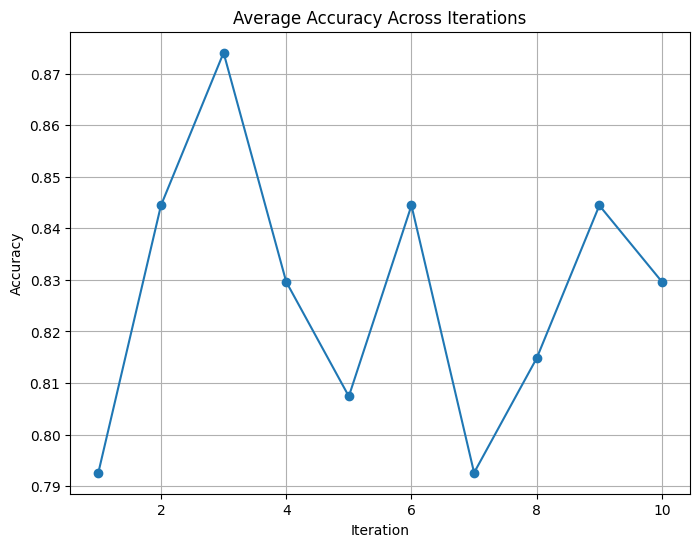

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Replace 'your_dataset.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Test_1_OnlyValidSubjectsData.csv'

# Assuming 'Sub_ID' and 'Seq_ID' are categorical columns
le_sub_id = LabelEncoder()
le_seq_id = LabelEncoder()

# Set up parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize lists to store accuracy scores
accuracies = []

# Perform 10 iterations
for iteration in range(1, 11):
    print(f"Iteration {iteration}")

    # Load your dataset
    df = pd.read_csv(file_path)

    # Encode categorical columns
    df['Sub_ID'] = le_sub_id.fit_transform(df['Sub_ID'])
    df['Seq_ID'] = le_seq_id.fit_transform(df['Seq_ID'])

    # Drop rows with missing target values
    df_numeric = df.select_dtypes(include=['number'])
    df_numeric.dropna(subset=['General Discomfort'], inplace=True)

    # Define features (X) and target variable (y)
    features = ['Sub_ID', 'Seq_ID', 'Fatigue', 'Headache', 'Eye Strain', 'Difficulty Focusing',
                'Salivation Increasing', 'Sweating', 'Nausea', 'Difficulty Concentrating',
                'Fullness of Head', 'Blurred Vision', 'Dizziness with Eye Open',
                'Dizziness with Eye Closed', 'Vertigo', 'Stomach Awareness', 'Burping']

    X = df_numeric[features]
    y = df_numeric['General Discomfort']

    # Split the dataset into training and testing sets without fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVM model
    svm_model = SVC(class_weight='balanced', random_state=42)

    # Set up GridSearchCV with parallel processing
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Train the model with grid search
    grid_search.fit(X_train_scaled, y_train)

    # Make predictions on the test set using the best model
    y_pred = grid_search.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print classification report for more details on performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")

# Plot average accuracy across all iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Average Accuracy Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


# New Section


**Random Forest ALGORITHM**



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Replace 'your_dataset.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Test_1_OnlyValidSubjectsData.csv'

# Assuming 'Sub_ID' and 'Seq_ID' are categorical columns
le_sub_id = LabelEncoder()
le_seq_id = LabelEncoder()

# Set up parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform 10 iterations
for iteration in range(1, 11):
    print(f"Iteration {iteration}")

    # Load your dataset
    df = pd.read_csv(file_path)

    # Encode categorical columns
    df['Sub_ID'] = le_sub_id.fit_transform(df['Sub_ID'])
    df['Seq_ID'] = le_seq_id.fit_transform(df['Seq_ID'])

    # Drop rows with missing target values
    df_numeric = df.select_dtypes(include=['number'])
    df_numeric.dropna(subset=['General Discomfort'], inplace=True)

    # Define features (X) and target variable (y)
    features = ['Sub_ID', 'Seq_ID', 'Fatigue', 'Headache', 'Eye Strain', 'Difficulty Focusing',
                'Salivation Increasing', 'Sweating', 'Nausea', 'Difficulty Concentrating',
                'Fullness of Head', 'Blurred Vision', 'Dizziness with Eye Open',
                'Dizziness with Eye Closed', 'Vertigo', 'Stomach Awareness', 'Burping']

    X = df_numeric[features]
    y = df_numeric['General Discomfort']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=iteration * 42)  # Change random_state

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

    # Set up GridSearchCV with parallel processing
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Train the model with grid search
    grid_search.fit(X_train, y_train)

    # Get the best parameters from grid search
    best_params = grid_search.best_params_

    # Make predictions on the test set using the best model
    y_pred = grid_search.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Print classification report and confusion matrix for more details on performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Iteration 1
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 86.67%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92        98
         1.0       0.74      0.70      0.72        33
         2.0       0.50      0.67      0.57         3
         3.0       1.00      1.00      1.00         1

    accuracy                           0.87       135
   macro avg       0.79      0.82      0.80       135
weighted avg       0.87      0.87      0.87       135

Confusion Matrix:
[[91  7  0  0]
 [ 8 23  2  0]
 [ 0  1  2  0]
 [ 0  0  0  1]]


Iteration 2
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 79.26%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       101
         1.0       0.50      0.37      0.43        27
         2.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 82.96%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       100
         1.0       0.61      0.67      0.63        30
         2.0       0.33      0.50      0.40         4
         3.0       0.50      1.00      0.67         1

    accuracy                           0.83       135
   macro avg       0.60      0.76      0.65       135
weighted avg       0.85      0.83      0.84       135

Confusion Matrix:
[[89 11  0  0]
 [ 5 20  4  1]
 [ 0  2  2  0]
 [ 0  0  0  1]]


Iteration 5
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 82.22%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       100
         1.0       0.48      0.52      0.50        23
         2.0       1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Gradient Boosting Machines algorithm**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier  # Import GBM
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Replace 'your_dataset.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Test_1_OnlyValidSubjectsData.csv'

# Assuming 'Sub_ID' and 'Seq_ID' are categorical columns
le_sub_id = LabelEncoder()
le_seq_id = LabelEncoder()

# Set up parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

# Perform 10 iterations
for iteration in range(1, 11):
    print(f"Iteration {iteration}")

    # Load your dataset
    df = pd.read_csv(file_path)

    # Encode categorical columns
    df['Sub_ID'] = le_sub_id.fit_transform(df['Sub_ID'])
    df['Seq_ID'] = le_seq_id.fit_transform(df['Seq_ID'])

    # Drop rows with missing target values
    df_numeric = df.select_dtypes(include=['number'])
    df_numeric.dropna(subset=['General Discomfort'], inplace=True)

    # Define features (X) and target variable (y)
    features = ['Sub_ID', 'Seq_ID', 'Fatigue', 'Headache', 'Eye Strain', 'Difficulty Focusing',
                'Salivation Increasing', 'Sweating', 'Nausea', 'Difficulty Concentrating',
                'Fullness of Head', 'Blurred Vision', 'Dizziness with Eye Open',
                'Dizziness with Eye Closed', 'Vertigo', 'Stomach Awareness', 'Burping']

    X = df_numeric[features]
    y = df_numeric['General Discomfort']

    # Split the dataset into training and testing sets without fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the GBM model
    gbm_model = GradientBoostingClassifier(random_state=42)

    # Set up GridSearchCV with parallel processing
    grid_search = GridSearchCV(gbm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Train the model with grid search
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters from grid search
    best_params = grid_search.best_params_

    # Make predictions on the test set using the best model
    y_pred = grid_search.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Print classification report and confusion matrix for more details on performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Iteration 1
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Accuracy: 83.70%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       105
         1.0       0.64      0.52      0.57        27
         2.0       0.67      0.67      0.67         3

    accuracy                           0.84       135
   macro avg       0.73      0.70      0.71       135
weighted avg       0.83      0.84      0.83       135

Confusion Matrix:
[[97  8  0]
 [12 14  1]
 [ 1  0  2]]


Iteration 2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Accuracy: 78.52%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        96
         1.0       0.52      0.59      0.55        29
         2.0       0.67      0.33      0.44         6
         3.0       1.00      0.75      0.86         4

    accuracy                           0.79       135
   macro avg       0.76      0.64      0.68       135
weighted avg       0.79      0.79      0.79       135

Confusion Matrix:
[[84 12  0  0]
 [12 17  0  0]
 [ 0  4  2  0]
 [ 0  0  1  3]]


Iteration 3
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 85.19%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       104
         1.0       0.65      0.61      0.63        28
         2.0       1.00      0.50      0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Accuracy: 88.89%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        98
         1.0       0.84      0.57      0.68        28
         2.0       0.83      0.83      0.83         6
         3.0       1.00      1.00      1.00         3

    accuracy                           0.89       135
   macro avg       0.89      0.85      0.86       135
weighted avg       0.89      0.89      0.88       135

Confusion Matrix:
[[96  2  0  0]
 [11 16  1  0]
 [ 0  1  5  0]
 [ 0  0  0  3]]


Iteration 6
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
Accuracy: 79.26%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        99
         1.0       0.50      0.56      0.53        27
         2.0       1.00      0.25      

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.8}
Accuracy: 80.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        97
         1.0       0.59      0.43      0.50        30
         2.0       0.17      0.20      0.18         5
         3.0       1.00      0.67      0.80         3

    accuracy                           0.80       135
   macro avg       0.66      0.56      0.60       135
weighted avg       0.79      0.80      0.79       135

Confusion Matrix:
[[92  5  0  0]
 [13 13  4  0]
 [ 0  4  1  0]
 [ 0  0  1  2]]


Iteration 8


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Accuracy: 85.19%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93        99
         1.0       0.68      0.61      0.64        28
         2.0       0.60      0.60      0.60         5
         3.0       0.67      0.67      0.67         3

    accuracy                           0.85       135
   macro avg       0.71      0.70      0.71       135
weighted avg       0.85      0.85      0.85       135

Confusion Matrix:
[[93  6  0  0]
 [ 9 17  1  1]
 [ 0  2  3  0]
 [ 0  0  1  2]]


Iteration 9
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Accuracy: 80.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90        96
         1.0       0.71      0.36      0.48        33
         2.0       0.20      0.25      0.

**Neural Networks algorithm**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier  # Import MLP
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Replace 'your_dataset.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Test_1_OnlyValidSubjectsData.csv'

# Assuming 'Sub_ID' and 'Seq_ID' are categorical columns
le_sub_id = LabelEncoder()
le_seq_id = LabelEncoder()

# Set up parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Perform 10 iterations
for iteration in range(1, 11):
    print(f"Iteration {iteration}")

    # Load your dataset
    df = pd.read_csv(file_path)

    # Encode categorical columns
    df['Sub_ID'] = le_sub_id.fit_transform(df['Sub_ID'])
    df['Seq_ID'] = le_seq_id.fit_transform(df['Seq_ID'])

    # Drop rows with missing target values
    df_numeric = df.select_dtypes(include=['number'])
    df_numeric.dropna(subset=['General Discomfort'], inplace=True)

    # Define features (X) and target variable (y)
    features = ['Sub_ID', 'Seq_ID', 'Fatigue', 'Headache', 'Eye Strain', 'Difficulty Focusing',
                'Salivation Increasing', 'Sweating', 'Nausea', 'Difficulty Concentrating',
                'Fullness of Head', 'Blurred Vision', 'Dizziness with Eye Open',
                'Dizziness with Eye Closed', 'Vertigo', 'Stomach Awareness', 'Burping']

    X = df_numeric[features]
    y = df_numeric['General Discomfort']

    # Split the dataset into training and testing sets without fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the MLP model
    mlp_model = MLPClassifier(random_state=42, max_iter=1000)

    # Set up GridSearchCV with parallel processing
    grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Train the model with grid search
    grid_search.fit(X_train_scaled, y_train)

    # Make predictions on the test set using the best model
    y_pred = grid_search.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Print classification report for more details on performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("\n" + "="*50 + "\n")


Iteration 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 82.96%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91        94
         1.0       0.79      0.53      0.63        36
         2.0       0.33      0.50      0.40         4
         3.0       0.50      1.00      0.67         1

    accuracy                           0.83       135
   macro avg       0.62      0.75      0.65       135
weighted avg       0.83      0.83      0.82       135



Iteration 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and

Accuracy: 78.52%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        93
         1.0       0.62      0.53      0.57        34
         2.0       0.38      0.43      0.40         7
         3.0       0.00      0.00      0.00         1

    accuracy                           0.79       135
   macro avg       0.47      0.47      0.47       135
weighted avg       0.77      0.79      0.78       135



Iteration 3
Accuracy: 77.78%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       103
         1.0       0.40      0.42      0.41        24
         2.0       0.60      0.60      0.60         5
         3.0       1.00      0.33      0.50         3

    accuracy                           0.78       135
   macro avg       0.72      0.56      0.60       135
weighted avg       0.78      0.78      0.78       135



Iteration 4


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and

Accuracy: 73.33%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85        97
         1.0       0.44      0.53      0.48        30
         2.0       0.33      0.29      0.31         7
         3.0       0.00      0.00      0.00         1

    accuracy                           0.73       135
   macro avg       0.41      0.41      0.41       135
weighted avg       0.74      0.73      0.74       135



Iteration 5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 74.07%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88        94
         1.0       0.48      0.48      0.48        31
         2.0       0.25      0.25      0.25         8
         3.0       0.00      0.00      0.00         2

    accuracy                           0.74       135
   macro avg       0.40      0.40      0.40       135
weighted avg       0.73      0.74      0.74       135



Iteration 6


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and

Accuracy: 80.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       100
         1.0       0.54      0.50      0.52        26
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00         3

    accuracy                           0.80       135
   macro avg       0.36      0.36      0.36       135
weighted avg       0.76      0.80      0.78       135



Iteration 7
Accuracy: 77.78%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88        94
         1.0       0.59      0.58      0.58        33
         2.0       0.33      0.17      0.22         6
         3.0       0.50      0.50      0.50         2

    accuracy                           0.78       135
   macro avg       0.57      0.53      0.55       135
weighted avg       0.76      0.78      0.77       135



Iteration 8


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 80.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       103
         1.0       0.52      0.54      0.53        28
         2.0       0.33      0.25      0.29         4

    accuracy                           0.80       135
   macro avg       0.58      0.56      0.57       135
weighted avg       0.80      0.80      0.80       135



Iteration 9


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 85.19%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       104
         1.0       0.62      0.70      0.65        23
         2.0       0.17      0.20      0.18         5
         3.0       0.50      0.33      0.40         3

    accuracy                           0.85       135
   macro avg       0.56      0.54      0.55       135
weighted avg       0.86      0.85      0.86       135



Iteration 10
Accuracy: 74.81%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88        99
         1.0       0.48      0.55      0.52        29
         2.0       0.11      0.25      0.15         4
         3.0       0.00      0.00      0.00         3

    accuracy                           0.75       135
   macro avg       0.37      0.41      0.39       135
weighted avg       0.77      0.75      0.76       135





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and

**K-Nearest Neighbors**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Replace 'your_dataset.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Test_1_OnlyValidSubjectsData.csv'

# Assuming 'Sub_ID' and 'Seq_ID' are categorical columns
le_sub_id = LabelEncoder()
le_seq_id = LabelEncoder()

# Set up parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Perform 10 iterations
for iteration in range(1, 11):
    print(f"Iteration {iteration}")

    # Load your dataset
    df = pd.read_csv(file_path)

    # Encode categorical columns
    df['Sub_ID'] = le_sub_id.fit_transform(df['Sub_ID'])
    df['Seq_ID'] = le_seq_id.fit_transform(df['Seq_ID'])

    # Drop rows with missing target values
    df_numeric = df.select_dtypes(include=['number'])
    df_numeric.dropna(subset=['General Discomfort'], inplace=True)

    # Define features (X) and target variable (y)
    features = ['Sub_ID', 'Seq_ID', 'Fatigue', 'Headache', 'Eye Strain', 'Difficulty Focusing',
                'Salivation Increasing', 'Sweating', 'Nausea', 'Difficulty Concentrating',
                'Fullness of Head', 'Blurred Vision', 'Dizziness with Eye Open',
                'Dizziness with Eye Closed', 'Vertigo', 'Stomach Awareness', 'Burping']

    X = df_numeric[features]
    y = df_numeric['General Discomfort']

    # Split the dataset into training and testing sets without fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the KNN model
    knn_model = KNeighborsClassifier()

    # Set up GridSearchCV with parallel processing
    grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Train the model with grid search
    grid_search.fit(X_train_scaled, y_train)

    # Make predictions on the test set using the best model
    y_pred = grid_search.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Print classification report for more details on performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("\n" + "="*50 + "\n")


Iteration 1
Accuracy: 82.22%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90        99
         1.0       0.76      0.46      0.57        35
         2.0       0.33      1.00      0.50         1

    accuracy                           0.82       135
   macro avg       0.65      0.80      0.66       135
weighted avg       0.82      0.82      0.81       135



Iteration 2
Accuracy: 78.52%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88        94
         1.0       0.69      0.31      0.43        35
         2.0       0.60      0.60      0.60         5
         3.0       1.00      1.00      1.00         1

    accuracy                           0.79       135
   macro avg       0.77      0.72      0.73       135
weighted avg       0.77      0.79      0.75       135



Iteration 3
Accuracy: 78.52%
Classification Report:
              precision 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 81.48%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       102
         1.0       0.53      0.31      0.39        26
         2.0       0.50      0.20      0.29         5
         3.0       1.00      1.00      1.00         2

    accuracy                           0.81       135
   macro avg       0.72      0.62      0.65       135
weighted avg       0.78      0.81      0.79       135



Iteration 5
Accuracy: 80.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88        99
         1.0       0.71      0.40      0.51        30
         2.0       0.00      0.00      0.00         4
         3.0       1.00      0.50      0.67         2

    accuracy                           0.80       135
   macro avg       0.63      0.46      0.52       135
weighted avg       0.77      0.80      0.77       135



Iteration 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 81.48%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90        95
         1.0       0.71      0.48      0.58        31
         2.0       0.50      0.60      0.55         5
         3.0       1.00      0.50      0.67         4

    accuracy                           0.81       135
   macro avg       0.77      0.63      0.67       135
weighted avg       0.81      0.81      0.80       135



Iteration 7


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 79.26%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        94
         1.0       0.62      0.46      0.53        28
         2.0       1.00      0.10      0.18        10
         3.0       1.00      0.67      0.80         3

    accuracy                           0.79       135
   macro avg       0.86      0.55      0.60       135
weighted avg       0.80      0.79      0.76       135



Iteration 8


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 80.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89        96
         1.0       0.57      0.41      0.48        29
         2.0       0.75      0.43      0.55         7
         3.0       1.00      0.67      0.80         3

    accuracy                           0.80       135
   macro avg       0.79      0.61      0.68       135
weighted avg       0.78      0.80      0.78       135



Iteration 9
Accuracy: 85.93%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       101
         1.0       0.76      0.48      0.59        27
         2.0       1.00      0.60      0.75         5
         3.0       1.00      1.00      1.00         2

    accuracy                           0.86       135
   macro avg       0.91      0.76      0.81       135
weighted avg       0.85      0.86      0.85       135



Iteration 10
Accuracy: 84.44%
Clas

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
